In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

input = 'V21_3.txt'

d = np.loadtxt(input, float, usecols=0, skiprows=3, delimiter=',')*10**(-2)
dt = np.loadtxt(input, float, usecols=1, skiprows=3, delimiter=',')



def R1(x, m, b):
    return m*x+b


popt_1_1, pcov_1_1 = curve_fit(R1, d, dt)
print(popt_1_1, pcov_1_1)

[7.08848486 0.03684847] [[ 0.00174251 -0.00126332]
 [-0.00126332  0.00095185]]


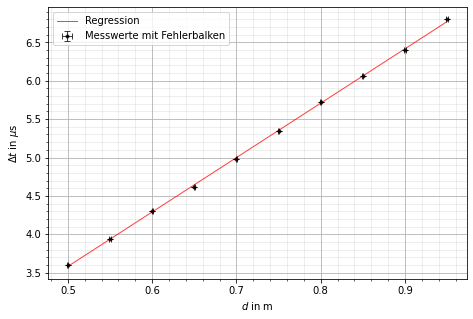

In [45]:
fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1_1 = np.linspace(min(d), max(d), 1000)

ax.set_xlabel(r'$d$ in m')
ax.set_ylabel(r'$\Delta t$ in $\mu$s')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_1, R1(xplot_1_1, *popt_1_1), color = 'red', alpha = 0.75, linewidth = 1, label = 'Regression')
ax.errorbar(d, dt, xerr = 0.0005*(2)**(1/2), yerr = 0.01*10**(-6), fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'Messwerte mit Fehlerbalken')
ax.legend()
ax.legend()
plt.savefig('./V21_1.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()